#  Predictive Modeling of Car Prices for Market Entry Strategy in the US Auto Industry 

In this project, we aim to develop a **predictive model for car prices** based on various features such as engine specifications, car dimensions, fuel type, and other attributes. The objective is to analyze the key factors that influence car prices and create an accurate model to estimate the price of a car given its features.  

### **Project Goals**  
1. **Understand the factors affecting car prices** – We explore how variables like horsepower, curb weight, fuel type, and brand influence the price.  
2. **Data Preprocessing & Feature Selection** – Handling missing values, encoding categorical data, normalizing numerical values, and selecting the most relevant features.  
3. **Model Development & Evaluation** – Implementing different machine learning models (Linear Regression, Decision Tree, and Random Forest) and comparing their performance using RMSE and R² scores.  
4. **Market Strategy Insights** – Using the best-performing model to assist automotive companies in pricing strategies, competitive analysis, and decision-making for market entry in the US auto industry.  

Through this predictive model, we aim to help businesses and consumers understand **price determinants**, make informed decisions, and enhance strategic planning in the automobile market.

## Import Libraries
 Let's Begin by importing all the required library packages.

In [33]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# module for performing test train split
from sklearn.model_selection import train_test_split
# Module for feture scaling
from sklearn.preprocessing import MinMaxScaler
# statmodel linear regression
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Reading the data

In [133]:
car_data = pd.read_csv('CarPrice_Assignment.csv')
# Check the head of the dataset
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [135]:
car_data.shape
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [52]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Check the data for missing values

In [57]:
# percentage of missing values in each column
round(car_data.isnull().sum()/len(car_data.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

The dataset is clean of any missing values.

In [64]:
# Dropping Duplicates if any
car_data=car_data.drop_duplicates()

## Function Definitions for Plotting
The `showLabels` function enhances bar plots by adding percentage labels on top of each bar, improving readability. It automatically adjusts label positioning based on bar height, aligning labels above positive values and below negative ones. If provided with a dictionary of category counts, it includes additional context in the labels. This function ensures clear and informative data visualization, making bar charts more insightful and user-friendly.

In [93]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for positive and negative values.

In [100]:
# Plot the percentage of cars in the US market for different car features
def plot_percentages(dataframe, var_list, sortbyindex=False):
    plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

In [98]:
#Function to plot a list of categorical variables together
def plot_cat(var_list):
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = car_data)
    plt.show()

In [104]:
#Function to plot the distribution plot of the numeric variable list
def plot_dist(var_list):
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,5,var_list.index(var)+1)
        
    plt.show()

## Custom Function Definitions For Model fitting

In [111]:
#Function to fit the linear regression model from the statmodel package
# Creating X_train dataframe with the selected variables
    # Adding a constant variable
def fit_LRM(X_train):
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [120]:
#X_train = df.drop(['const'], axis=1)
# Calculate the VIFs for the new model
def getVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## Data Analysis

### Pairplot of Data

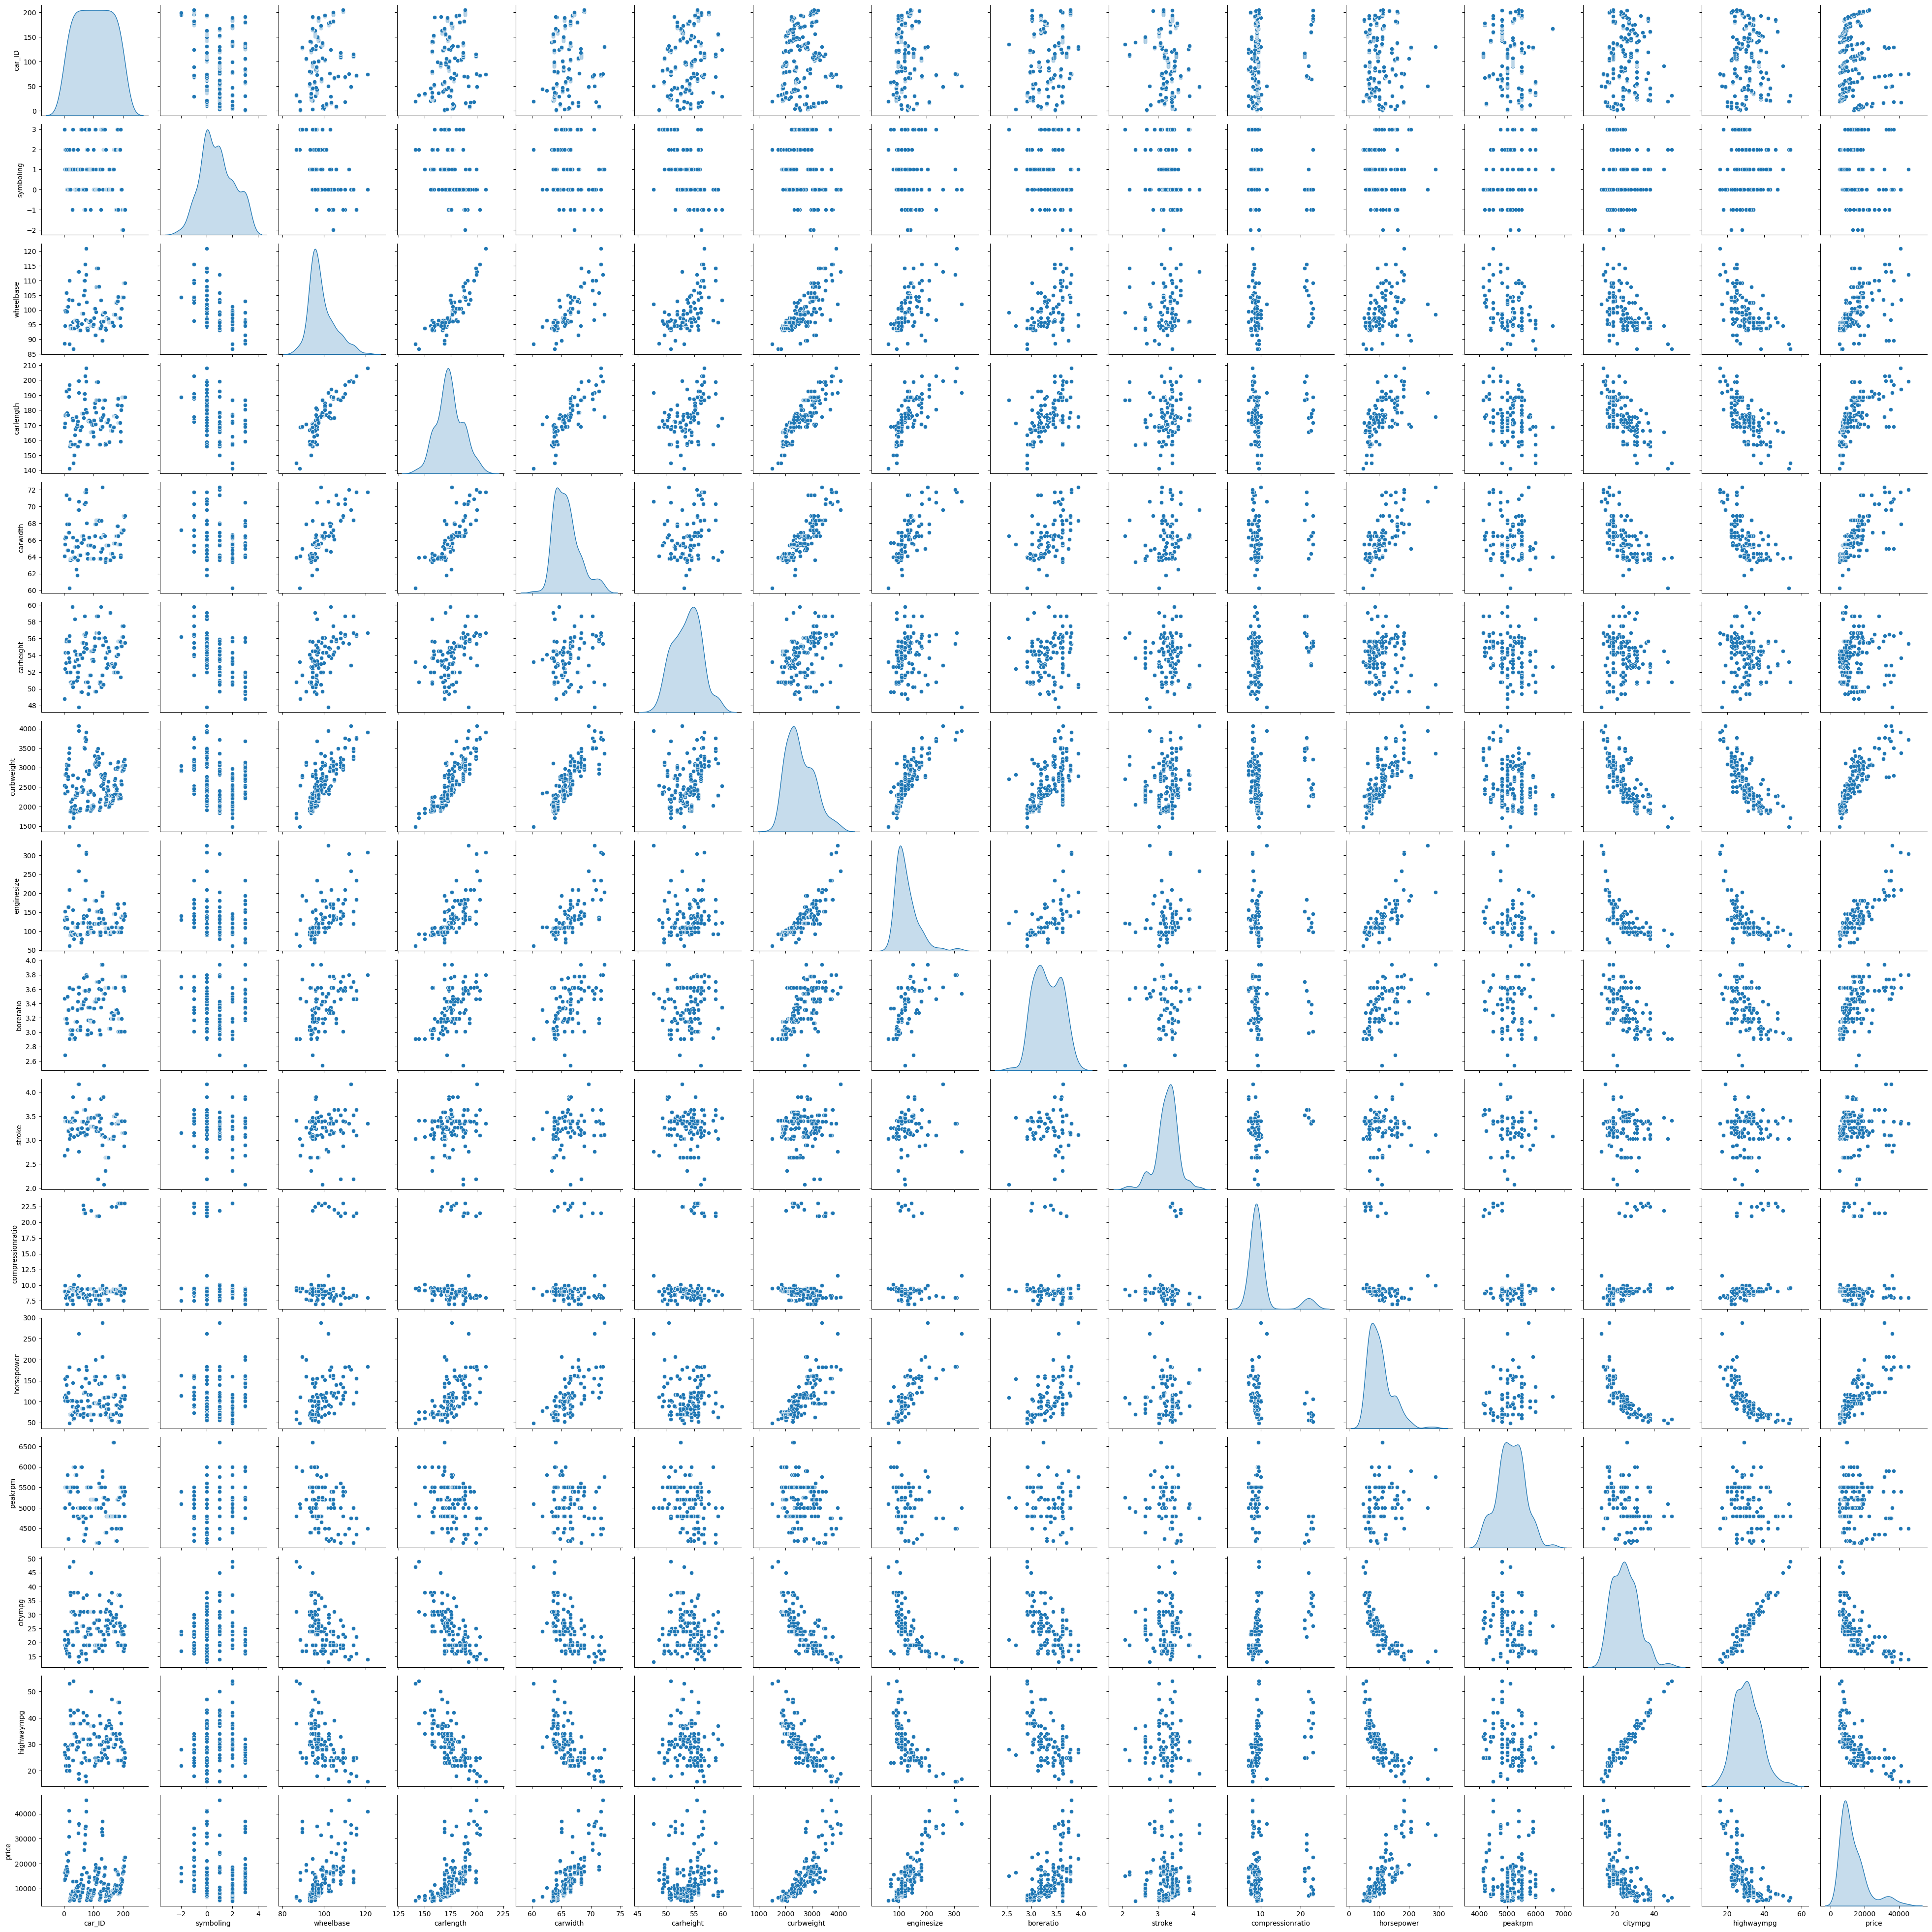

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for pairplot
numeric_data = car_data.select_dtypes(include=['number'])

# Create pairplot 
sns.pairplot(numeric_data, diag_kind='kde', palette="magma")

plt.show()


### Correlation Heatmap of Data

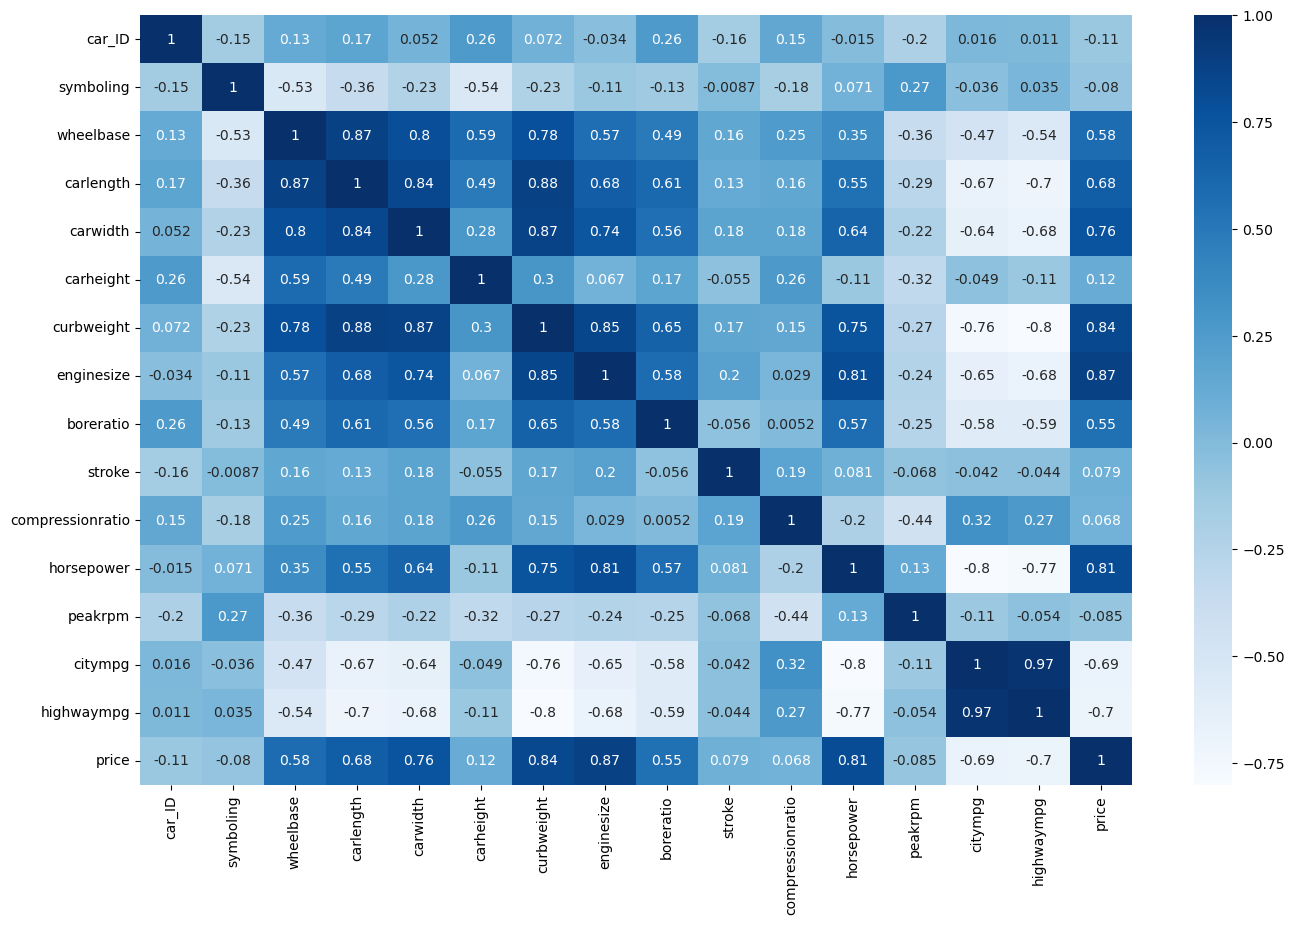

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns before computing the correlation
numeric_data = car_data.select_dtypes(include=['number'])

plt.figure(figsize=(16, 10))
cor = numeric_data.corr()  # Compute correlation only for numerical columns
sns.heatmap(cor, annot=True, cmap="Blues")
plt.show()


- The heatmap shows that **engine size, horsepower, and curb weight** have a strong impact on car prices, while higher mileage tends to lower the price.  
- The pairplot reveals clear patterns between features, but there are a few **outliers** that might need attention.  
- Overall, focusing on the most relevant features and handling outliers can **improve the accuracy** of our price predictions.

Symboling is a categorical variable which has been treeted as a numeric int64 type variable. Let's convert the symboling variable.
<br> Here Symboling is the assigned insurance risk rating,A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.<br>
Let's make the category clear by classifying based on risk
-  -ve symboling as __safe__
-  0, 1 as **moderate**
-  2,3 as **risky** 

In [183]:
car_data['symboling'] = car_data['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

The categorical variable **CarName** is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building. 

In [189]:
car_data['car_company'] = car_data['CarName'].apply(lambda x: x.split( )[0])
car_data.drop('CarName',axis=1,inplace=True)

In [191]:
car_data['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Here, we observe that there are multiple company names are being **misspelled**. We need to correct this in the data.

In [198]:
# Correcting the misspelled company names.
car_data['car_company'].replace('maxda','mazda',inplace=True)
car_data['car_company'].replace('Nissan','nissan',inplace=True)
car_data['car_company'].replace('porcshce','porsche',inplace=True)
car_data['car_company'].replace('toyouta','toyota',inplace=True)
car_data['car_company'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [201]:
categorical_variables = list(car_data.columns[car_data.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

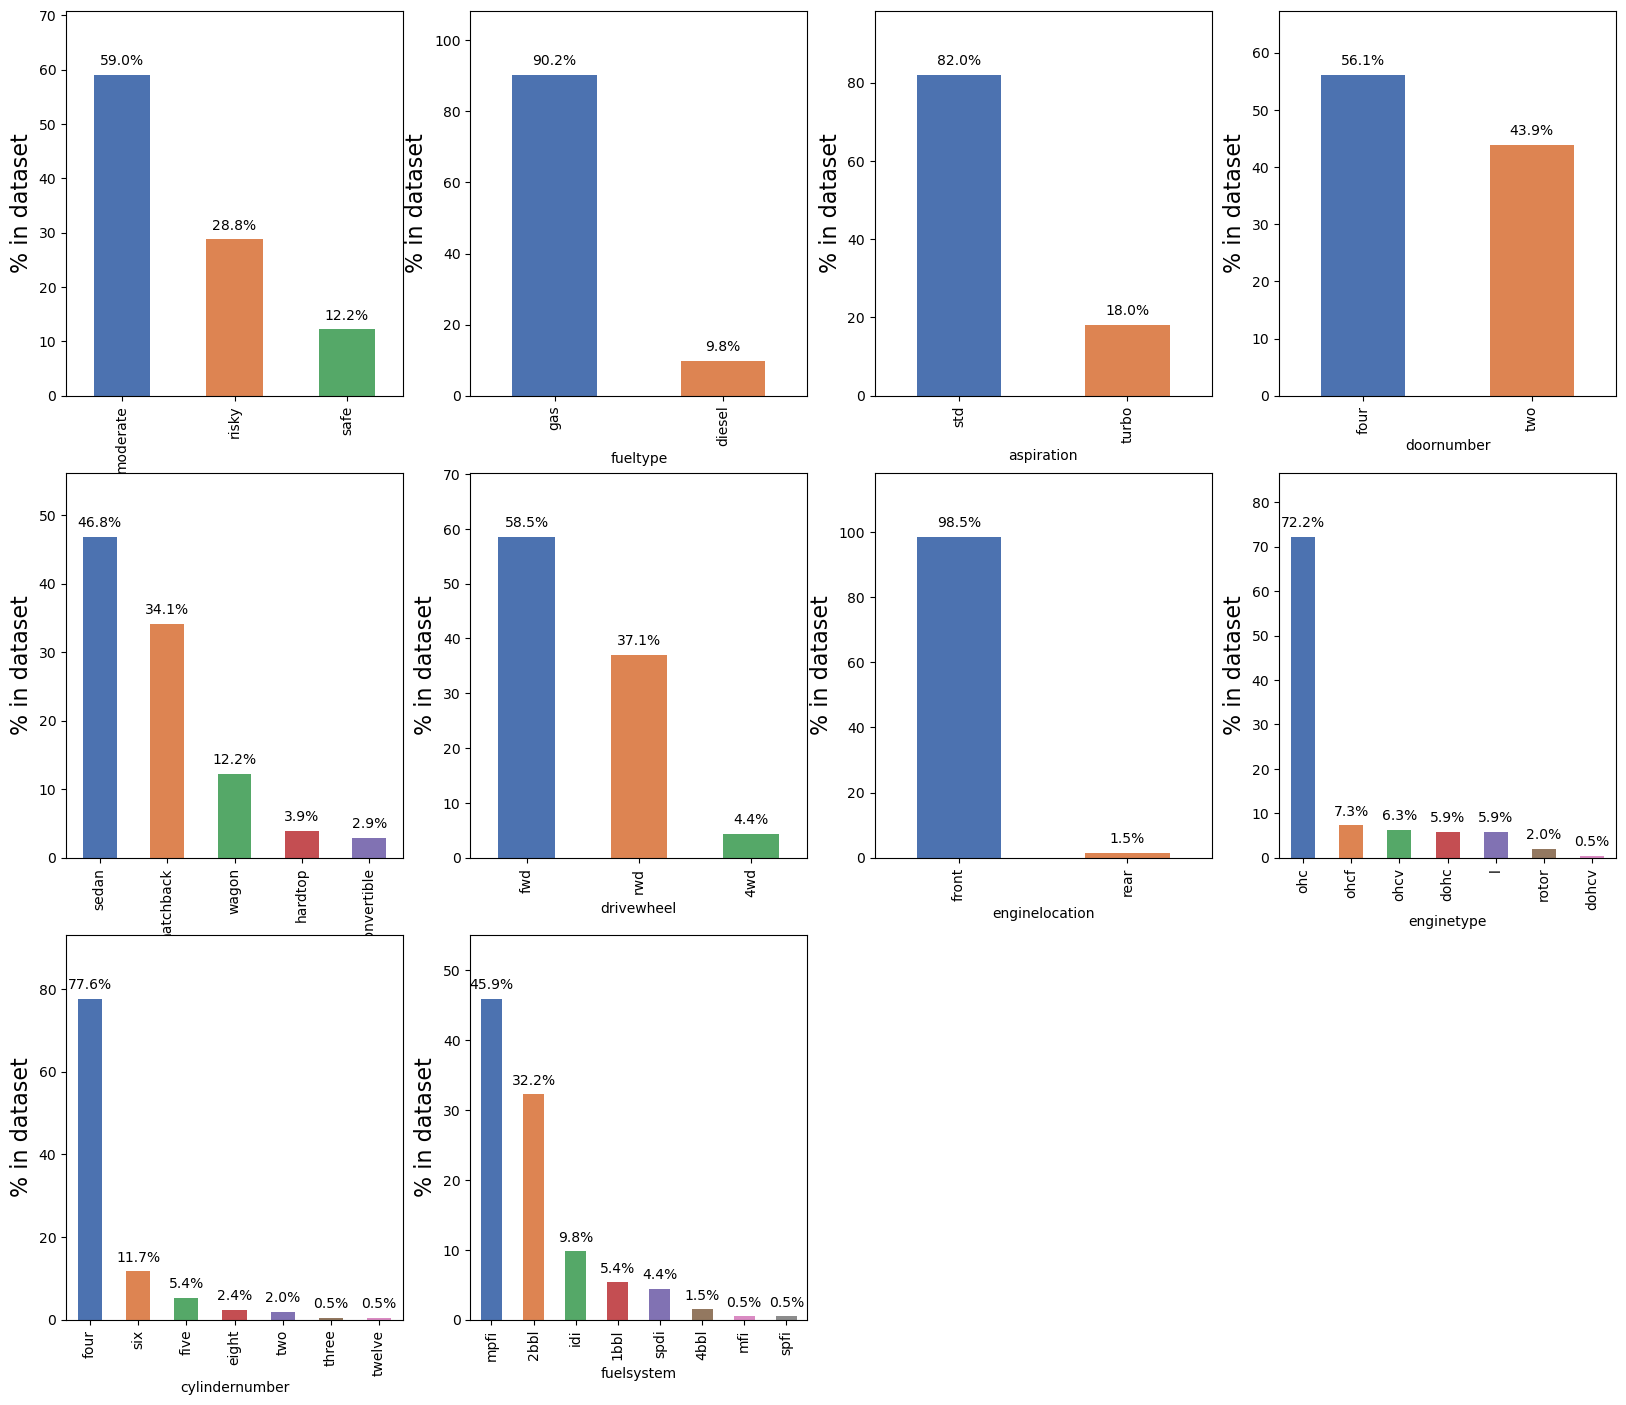

In [204]:
# market percentage of cars with respect to features
plot_percentages(car_data,categorical_variables[:-1])

We can identify some of the car **features that are predominant** in the US Automobile Market. Geely Automotives can consider these facts to fulfill the market dominant needs and make the necessary changes to their manufacturing line.
These features are as follows:
-  **symboling:** moderate (0,1)
-  **Carbody:** Sedan
-  **fueltype:** gas
-  **aspiration:** standard
-  **doornumbers:** four
-  **drivewheel:** forward
-  **engine location:** front
-  **engine type:** ohc
-  **cylinderNumber:** four
-  **fuelSystem**: mpfi


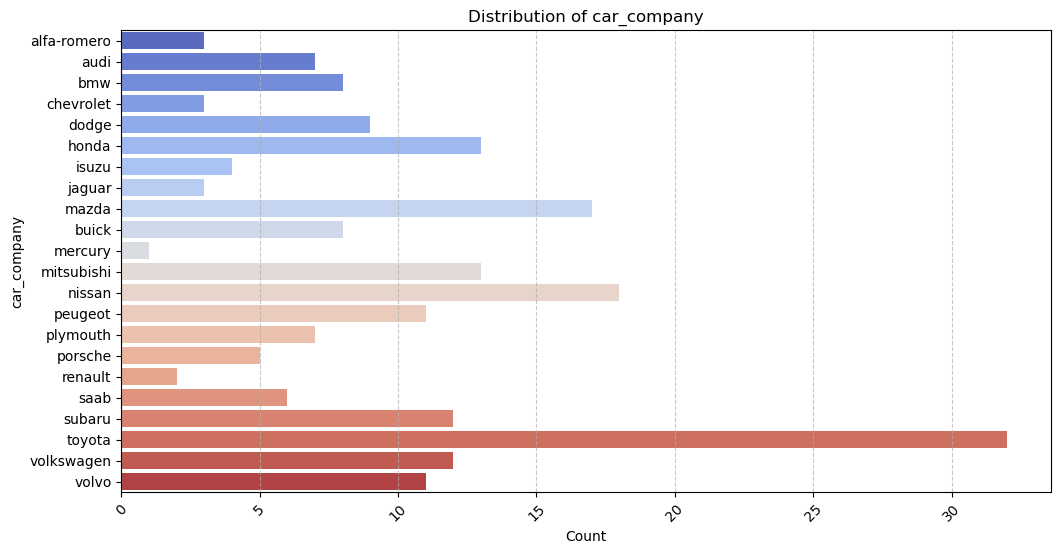

In [216]:
plt.figure(figsize=(12, 6))

# Horizontal bar plot for better readability
sns.countplot(y=categorical_variables[-1], data=car_data, palette="coolwarm")

plt.xlabel("Count")
plt.ylabel(categorical_variables[-1])
plt.title(f"Distribution of {categorical_variables[-1]}")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for readability

plt.show()


From the above plot, it is clearly observed that Toyota has adominant market percentage in the US market, which is 15.6%.
This is followed by Nissan with 8.8% and Mazda with 8.2%. Mitsubishi and Honda are equally popular with 6.3% market percentage.

Let us observe how these categorical variables relate one-to-one with the target variable-Price.

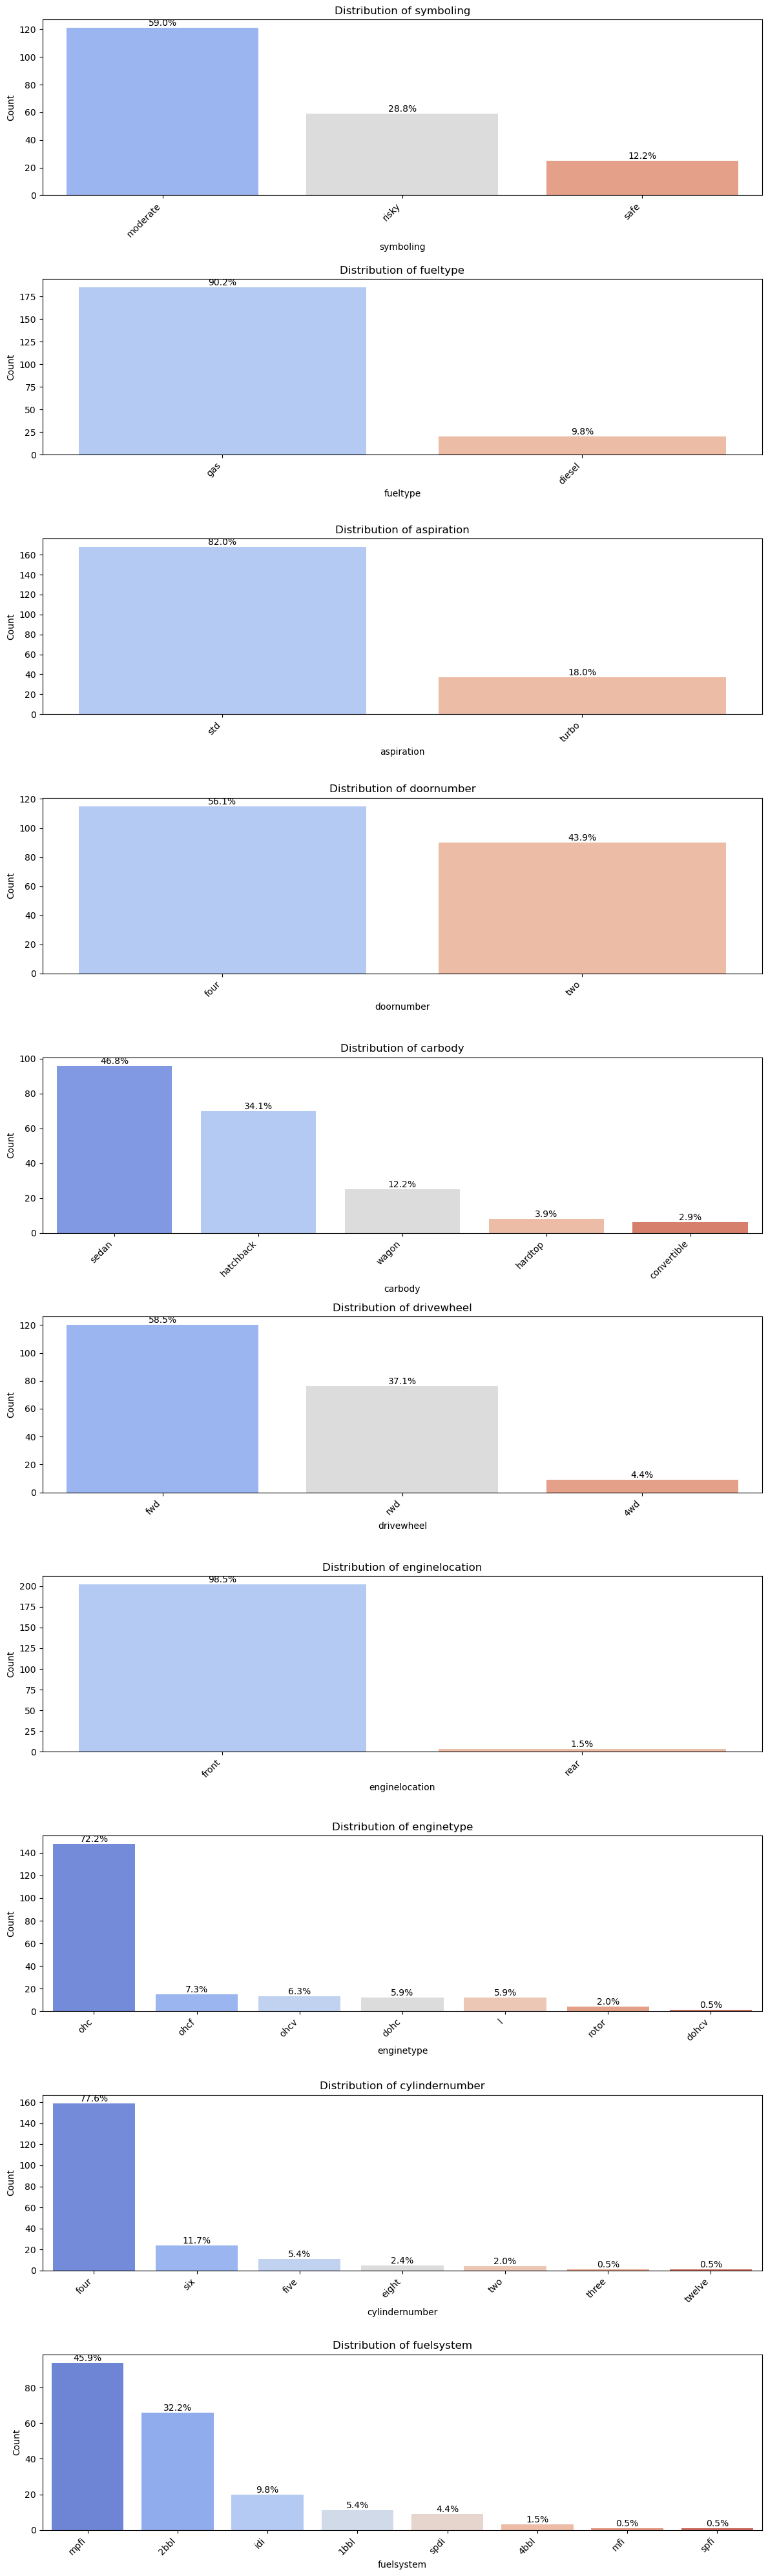

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cat(variables):
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(12, len(variables) * 4))

    for i, var in enumerate(variables):
        ax = axes[i] if len(variables) > 1 else axes  # Handle single subplot case
        order = car_data[var].value_counts().index  # Sort categories by count
        
        sns.countplot(x=car_data[var], data=car_data, palette="coolwarm", order=order, ax=ax)
        ax.set_title(f"Distribution of {var}")
        ax.set_xlabel(var)
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        
        # Add percentage labels
        total = len(car_data[var])
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)

    plt.tight_layout()
    plt.show()

# Call the function with categorical variables (excluding the last one)
plot_cat(categorical_variables[:-1])


Let us see how the price varies with different automobile companies in the US market.

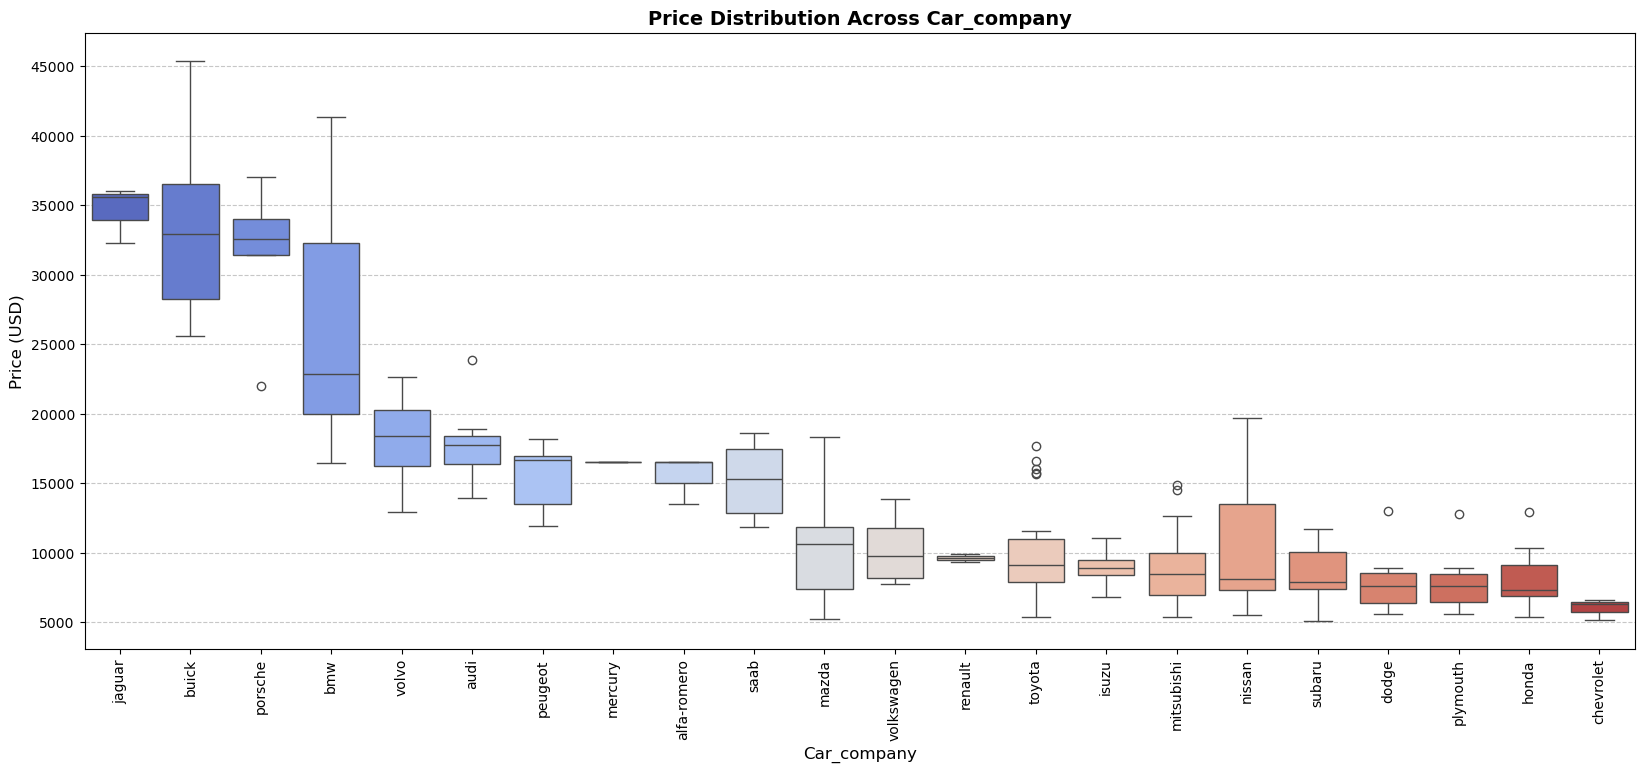

 Average US Car Price: $13,276.71

 Top 5 Most Expensive Car Brands (Average Price):

car_company
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818


In [236]:
plt.figure(figsize=(20, 8))

# Sort car companies by median price for better readability
sorted_companies = car_data.groupby(categorical_variables[-1])['price'].median().sort_values(ascending=False).index

# Enhanced boxplot with sorted categories 
sns.boxplot(x=categorical_variables[-1], y='price', data=car_data, order=sorted_companies, palette="coolwarm")

plt.xticks(rotation=90)  # Rotate labels for clarity
plt.title(f"Price Distribution Across {categorical_variables[-1].capitalize()}", fontsize=14, fontweight='bold')
plt.xlabel(categorical_variables[-1].capitalize(), fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability

plt.show()

# Summary Statistics
average_price = car_data['price'].mean()
top_companies = car_data.groupby(categorical_variables[-1])['price'].mean().sort_values(ascending=False).head()

print(f" Average US Car Price: ${average_price:,.2f}\n")
print(" Top 5 Most Expensive Car Brands (Average Price):\n")
print(top_companies.to_string())


## Outlier Treatment

Outlier treatment is the process of identifying and handling extreme values in a dataset that significantly differ from most of the data points. These values can distort statistical analysis and negatively impact machine learning models. Treating outliers is important to Improve Model Accuracy, Enhance Data Integrity and Prevent Overfitting.

Numeric Variables: ['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


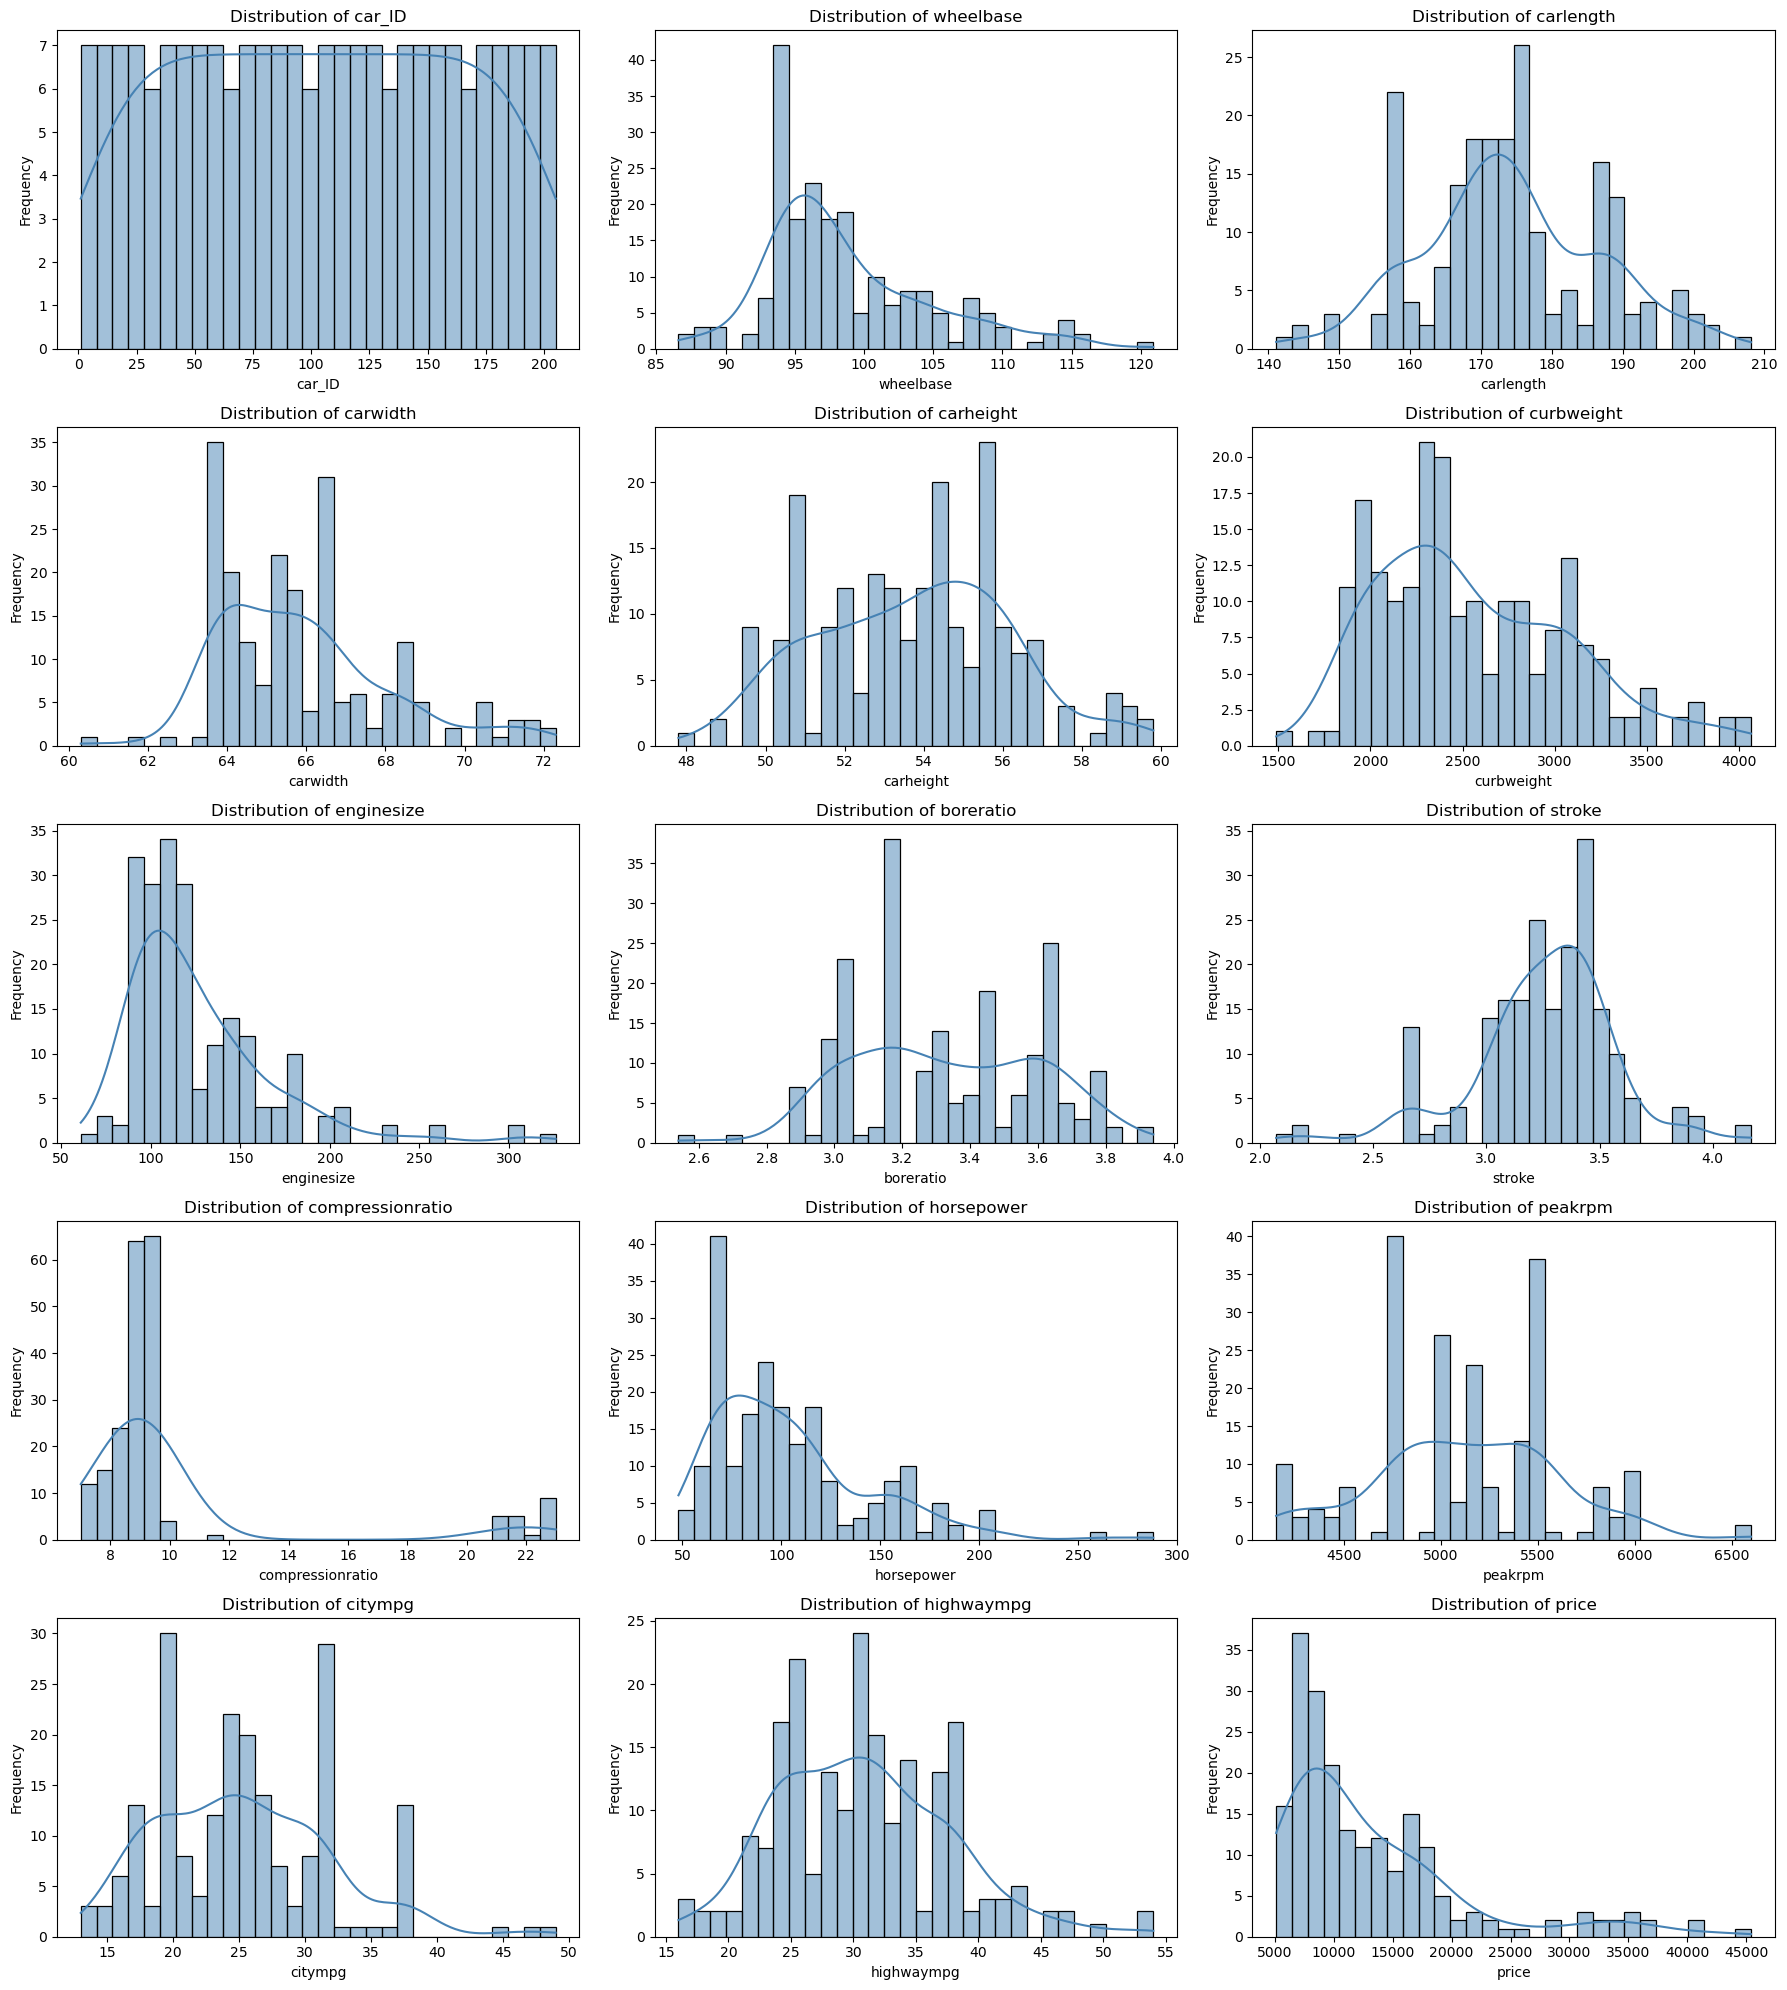

In [248]:
# Extract numeric variables
numeric_variables = list(car_data.select_dtypes(include=['number']).columns)
print("Numeric Variables:", numeric_variables)

# Function to plot distributions
def plot_dist(variables):
    num_vars = len(variables)
    rows = (num_vars // 3) + (num_vars % 3 > 0)  # Create rows dynamically
    fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))  # Adjust size

    for i, var in enumerate(variables):
        row, col = divmod(i, 3)  # Determine subplot position
        sns.histplot(car_data[var], kde=True, bins=30, ax=axes[row, col], color="steelblue")
        axes[row, col].set_title(f"Distribution of {var}")
        axes[row, col].set_xlabel(var)
        axes[row, col].set_ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

# Call the function with numeric variables
plot_dist(numeric_variables)


In [252]:
print(car_data[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(car_data[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


In [256]:
# Outilers in price of cars
car_data['horsepower'][np.abs(car_data['horsepower'] > 182.00)]= 182.00
car_data['horsepower'][np.abs(car_data['horsepower'] > 3657.80)]= 3657.80
car_data['enginesize'][np.abs(car_data['enginesize'] > 209.00)]= 209.00
car_data['compressionratio'][np.abs(car_data['compressionratio'] > 10.94)]= 10.94

In [259]:
 car_data= car_data[np.abs(car_data.price-car_data.price.mean()) <= (3*car_data.price.std())]

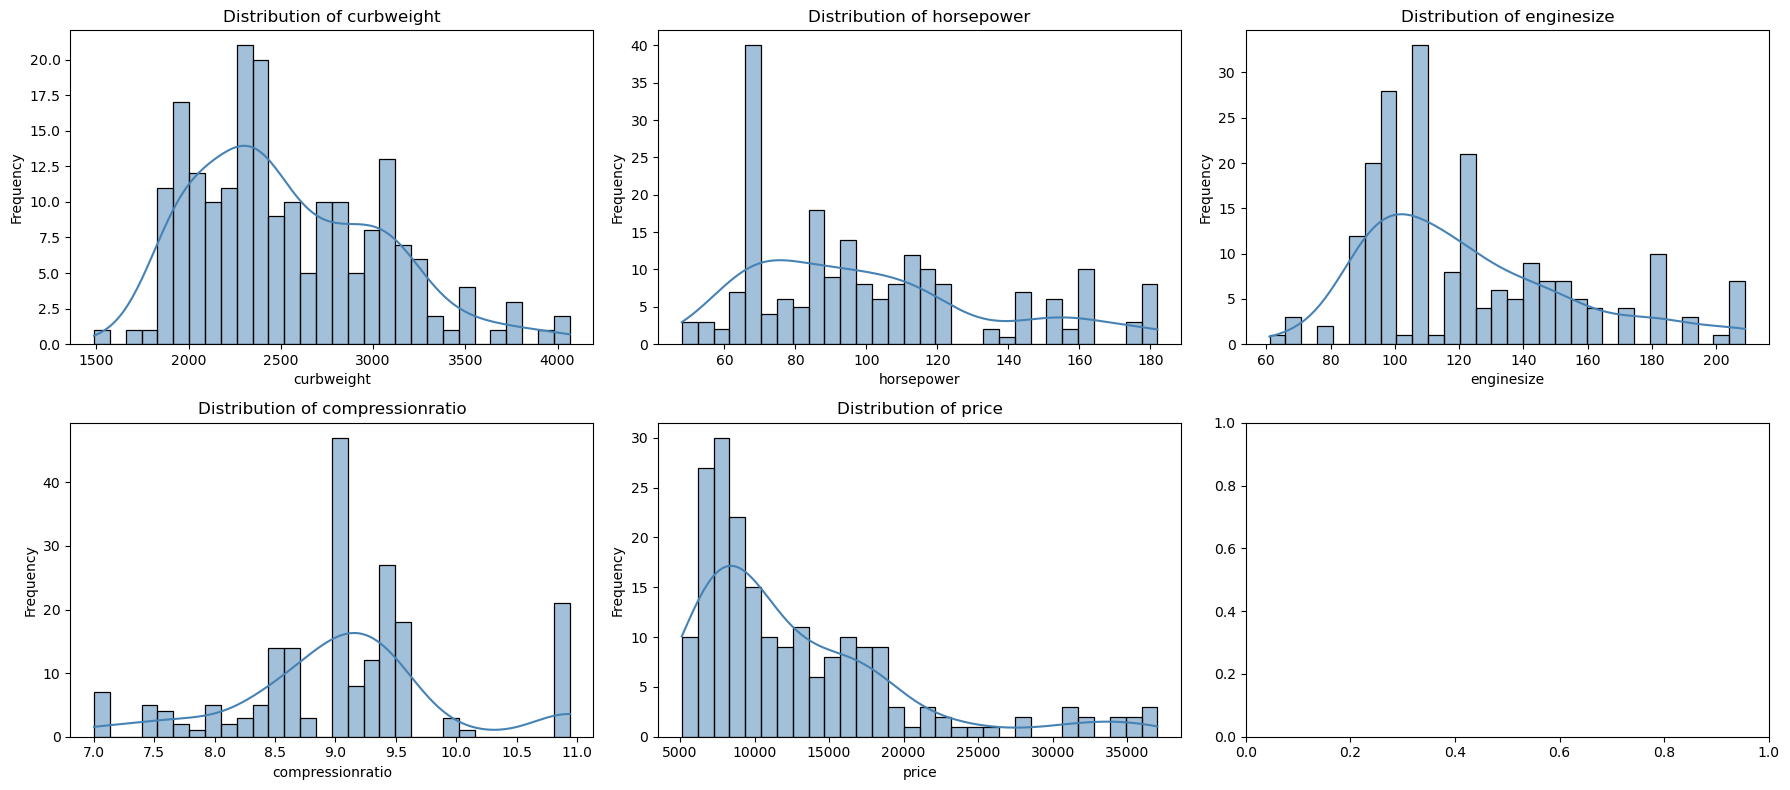

In [262]:
plot_dist(['curbweight','horsepower','enginesize','compressionratio','price'])

#### Creating new variables
This is done to remove corelated variables.

Earlier, from the scatter plot and the heatmap, we noticed that there is a high correlation between carlength, wheelbase, car width, car weight and city/highway mpg's. Let us create new variables from these to reduce the multicollinearity.

In [270]:
# Creating new variable carLWratio
car_data['carLWratio'] = car_data.carlength/car_data.carwidth
# Creating new variable carWHratio
car_data['carWHratio'] = car_data.carwidth/car_data.carheight
# Creating new variable PWratio
car_data['PWratio'] = car_data.horsepower/car_data.curbweight
# Creating new variable HCmpgratio
car_data['HCmpgratio'] = car_data.highwaympg/car_data.citympg
## dropping the orignal variables
car_data.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

Since we saw that the company brand value also determines the pricing of the car, let's create a company_segment categorical variable which would suggest us under which segment tier does the car_company comes.<br>
We will segment the car companies based on the mean company price as 
-  __lowtier__ if the company mean price is below 10,000
-  __midtier__ if the company mean price is above 10,000 and below 20,000
-  __hightier__ if the company mean price is above 20,000

In [275]:
car_data.groupby('car_company').price.mean().sort_values(ascending=False)

car_company
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [278]:
company_segment_dict = {
    'cheverolet' : 'lowtier',
    'dodge' : 'lowtier',
    'plymouth' : 'lowtier',
    'honda' : 'lowtier',
    'subaru' : 'lowtier',
    'isuzu' : 'lowtier',
    'mitsubishi' : 'lowtier',
    'renault' : 'lowtier',
    'toyota' : 'lowtier',
    'volkswagen' : 'midtier',
    'nissan' : 'midtier',
    'mazda' : 'midtier',
    'saab' : 'midtier',
    'peugeot' : 'midtier',
    'alfa-romero' : 'midtier',
    'mercury' : 'midtier',
    'audi' : 'midtier',
    'volvo' : 'midtier',
    'bmw' : 'hightier',
    'buick' : 'hightier',
    'porsche' : 'hightier',
    'jaguar' : 'hightier',
    }
car_data['company_segment'] = car_data['car_company'].map(company_segment_dict)
# Dropping the orignal car_company variable
car_data.drop('car_company',axis=1,inplace=True)
car_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,1,risky,gas,std,two,convertible,rwd,front,88.6,2548,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,2,risky,gas,std,two,convertible,rwd,front,88.6,2548,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,3,moderate,gas,std,two,hatchback,rwd,front,94.5,2823,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,4,risky,gas,std,four,sedan,fwd,front,99.8,2337,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,5,risky,gas,std,four,sedan,4wd,front,99.4,2824,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [281]:
car_data.groupby('company_segment').price.mean()

company_segment
hightier    29107.309524
lowtier      8987.369565
midtier     13231.839151
Name: price, dtype: float64

### Handling Categorical Variables for Linear Regression

In [286]:
# Converting categorical variables with two levels to either 1 or 0
car_data['fueltype'] = car_data['fueltype'].map({'gas': 1, 'diesel': 0})
car_data['aspiration'] = car_data['aspiration'].map({'std': 1, 'turbo': 0})
car_data['doornumber'] = car_data['doornumber'].map({'two': 1, 'four': 0})
car_data['enginelocation'] = car_data['enginelocation'].map({'front': 1, 'rear': 0})
car_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,...,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,1,risky,1,1,1,convertible,rwd,1,88.6,2548,...,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,midtier
1,2,risky,1,1,1,convertible,rwd,1,88.6,2548,...,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,midtier
2,3,moderate,1,1,1,hatchback,rwd,1,94.5,2823,...,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,midtier
3,4,risky,1,1,0,sedan,fwd,1,99.8,2337,...,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,midtier
4,5,risky,1,1,0,sedan,4wd,1,99.4,2824,...,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,midtier


In [289]:
# Creating dummy variables
df = pd.get_dummies(car_data)
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
df.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'company_segment_lowtier'],axis=1,inplace=True)
df.columns

Index(['car_ID', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'carLWratio',
       'carWHratio', 'PWratio', 'HCmpgratio', 'symboling_moderate',
       'symboling_safe', 'carbody_convertible', 'carbody_hardtop',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'company_segment_hightier',
       'company_segment_midtier'],
      dtype='object')

In [292]:
from sklearn.model_selection import train_test_split

# Splitting the avilable data into training and testing set.
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Feature Scaling

In [298]:
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','carLWratio','carWHratio','PWratio','HCmpgratio','stroke','compressionratio','peakrpm','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,car_ID,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_segment_hightier,company_segment_midtier
1,2,1,1,1,1,0.068966,0.411171,0.466216,0.664286,0.290476,...,False,False,False,False,False,True,False,False,False,True
165,166,1,1,1,1,0.272414,0.301396,0.250000,0.500000,0.480952,...,False,False,False,False,False,True,False,False,False,False
197,198,1,1,0,1,0.610345,0.602793,0.540541,0.885714,0.514286,...,False,False,False,False,False,True,False,False,False,True
169,170,1,1,1,1,0.406897,0.412335,0.574324,0.771429,0.680952,...,False,False,False,False,False,True,False,False,False,False
190,191,1,1,1,1,0.272414,0.284329,0.324324,0.464286,0.633333,...,False,False,False,False,False,True,False,False,False,True


In [301]:
df_train.describe()

,car_ID,fueltype,aspiration,doornumber,enginelocation,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,100.489362,0.886525,0.794326,0.439716,0.985816,0.413402,0.411779,0.420979,0.559980,0.551570,0.536415,0.395469,0.392387,0.247719,0.577906,0.371315,0.417351,0.351657
std,60.241137,0.318304,0.405634,0.498122,0.118672,0.198892,0.198452,0.225970,0.192528,0.150278,0.229812,0.251396,0.199860,0.229291,0.184524,0.156047,0.177756,0.143889
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,1.000000,0.000000,1.000000,0.272414,0.254849,0.243243,0.421429,0.490476,0.406091,0.164179,0.265306,0.087432,0.479683,0.275790,0.309148,0.275974
50%,99.000000,1.000000,1.000000,0.000000,1.000000,0.358621,0.359193,0.337838,0.550000,0.571429,0.507614,0.350746,0.387755,0.175682,0.578580,0.346648,0.382528,0.348974
75%,150.000000,1.000000,1.000000,1.000000,1.000000,0.503448,0.552366,0.540541,0.742857,0.633333,0.609137,0.507463,0.551020,0.342548,0.701714,0.453372,0.510662,0.406699
max,205.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [306]:
Y_train = df_train.pop('price')
X_train = df_train

## Building our model

We are using the 'LinearRegression' function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#### Recursive Feature Elimination(RFE)

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lm = LinearRegression()
lm.fit(X_train, Y_train)  # Fit the model

# Run RFE and select 15 best features
rfe = RFE(estimator=lm, n_features_to_select=15)  # Explicitly define parameter
rfe = rfe.fit(X_train, Y_train)

# Display selected features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


In [330]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'stroke', 'horsepower', 'peakrpm',
       'carLWratio', 'carWHratio', 'PWratio', 'carbody_convertible',
       'enginetype_ohc', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_4bbl', 'company_segment_hightier'],
      dtype='object')

In [333]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'fueltype', 'aspiration', 'doornumber', 'curbweight',
       'enginesize', 'boreratio', 'compressionratio', 'HCmpgratio',
       'symboling_moderate', 'symboling_safe', 'carbody_hardtop',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_segment_midtier'],
      dtype='object')

In [408]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Ensure y_train is a Pandas Series before resetting index
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)  # Convert back to Pandas Series

# Ensure X_train_rfe and y_train have matching rows
y_train = y_train[:len(X_train_rfe)].reset_index(drop=True)  # Adjust y_train size and reset index
X_train_rfe = X_train_rfe.reset_index(drop=True)  # Reset index

# Convert DataFrame to NumPy arrays after cleaning
X_train_rfe = np.array(X_train_rfe, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)

# Handle NaN values
X_train_rfe = np.nan_to_num(X_train_rfe)

# Add constant for intercept in OLS model
X_train_rfe = sm.add_constant(X_train_rfe)

# Define function to fit linear regression model
def fit_LRM(X_train, y_train):
    lm = sm.OLS(y_train, X_train).fit()
    print(lm.summary())
    return lm

# Fit the model
lm = fit_LRM(X_train_rfe, y_train)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     1.613
Date:                Thu, 27 Feb 2025   Prob (F-statistic):             0.0792
Time:                        17:19:52   Log-Likelihood:                -1443.3
No. Observations:                 141   AIC:                             2919.
Df Residuals:                     125   BIC:                             2966.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3235.1424   9493.693     -0.341      0.7

- fuelsystem_4bbl has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.
- cylindernumber_five has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.
- cylindernumber_six has a p-value > 0.05. Meaning this variable is not having enough impact. Let's drop it.
-  carLWratio is having a high VIF and is highly correlated to wheelbase and slightly with horsepower. Let's remove this.

## Final Inference

With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.

| Predictor | Coef | p-value |
| --- | --- | --- |
| wheelbase | 0.3058 | 0.000 |
| horsepower | 0.3750 | 0.000 |
| carbody_convertible | 0.1785 | 0.000 |
| cylindernumber_four | -0.0686 | 0.001 |
| company_segment_hightier | 0.3129 | 0.000 |

We can see that the equation of our best fitted line is:

**$ price = -0.0133 + 0.3058  \times  wheelbase + 0.3750 \times horsepower + 0.1785 \times carbody\_convertible - 0.0686 \times cylindernumber\_four + 0.3129 \times company\_segment\_hightier $**

This equation implies how the price of the vehicle changes with a unit change in any of these independent variables with all other variables held constant.<br>For example we can say, the price of the car changes by 0.3058 for every unit change in the wheelbase dimension if all other variables are held constant. And so is true for all other variables.
<br> The predictor carbody_convertible suggest that the price of car increases by a factor of 0.1785 when the car body is convertible.
<br> The cylinder_number_four is the most commonly available feature in 77.6% of the car data in USA and since having 4 cylinder is attributed with relatively low price cars the coeffeciant for this variable is negative.
<br> The company name is also essensial in determining the price the automobile. High tier companies names like, BMW, Buik, Porsche and Jaguar further adds up to the price by a factor of 0.3129.

Overall we have a decent model, but we also acknowledge that we could do better. 

| Adj. R-squared | r2_score | Prob (F-statistic) | AIC | BIC | RMSE
| --- | --- | --- | --- | --- | --- |
| 0.907 | 0.905 | 9.11e-69 | -343.8 | -326.1 | 0.067

We have a couple of options:
1. Add new features (ground_area= carlength * carwidth, etc.)
2. choosing another set of variables to get a more normal distribution of error terms or use more useful variables like PWratio inplace of horsepower. 
3. Build a non-linear model

**Suggestions:**<br>
The chinese company  Geely Automotives entering the US market should consider the below listed points,

-  **Average US car price:**  13000 USD(approx).
For profitability and effective pricing of cars in this new market, the model's price predictors variables have to be regulated and balanced effectively to meet certain price levels and gain an edge over the other competitors.<br>
<br>
Also, keeping into account the predominating or the popular factors of a car in US market will give a better understanding of the needs and requirment of the citizens of USA.
-  **symboling:** moderate (0,1)
-  **Carbody:** Sedan
-  **fueltype:** gas
-  **aspiration:** standard
-  **doornumbers:** four
-  **drivewheel:** forward
-  **engine location:** front
-  **engine type:** ohc
-  **cylinderNumber:** four
-  **fuelSystem**: mpfi

This can be used to make the appropriate changes in design, features and the price offered to the customer.